## IMPLEMENTING WITH DECISION TREE

# Data Reading

The first step of the analysis consists of importing necessary libraries, reading and storing the data in a Pandas data frame 

In [36]:
#importing the necessary library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [37]:
#loading data set
df= pd.read_csv('CustomerChurn.csv')

In [38]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [39]:
#number of the rows and columns of the dataset
df.shape

(3150, 14)

In [40]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

**Call Failures:** number of call failures

**Complains:** binary (0: No complaint, 1: complaint)

**Subscription Length:** total months of subscription

**Charge Amount:** Ordinal attribute (0: lowest amount, 9: highest amount)

**Seconds of Use:** total seconds of calls

**Frequency of use:** total number of calls

**Frequency of SMS:** total number of text messages

**Distinct Called Numbers:** total number of distinct phone calls

**Age Group:** ordinal attribute (1: younger age, 5: older age)

**Tariff Plan:** binary (1: Pay as you go, 2: contractual)

**Status:** binary (1: active, 2: non-active)

**Customer Value:** The calculated value of customer

**Churn:** binary (1: churn, 0: non-churn) - Class label

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [42]:
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

**Inference:**

 The Age column and Age Group column contain same unique variable counts

In [43]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

**Inference:**

No missing data


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


### **Investigating the Age and Age group Columns**

In [45]:
# Drop duplicate rows based on the 'Age Group' column, keeping only the first occurrence
unique_age_groups = df[['Age', 'Age Group']].drop_duplicates(subset='Age Group')

# Sort the resulting DataFrame by 'Age Group' in descending order
unique_age_groups = unique_age_groups.sort_values(by='Age Group', ascending=False)

# Reset the index of the sorted DataFrame, dropping the old index
unique_age_groups = unique_age_groups.reset_index(drop=True)

unique_age_groups

,Age,Age Group
0,55,5
1,45,4
2,30,3
3,25,2
4,15,1


**Inference** 

The **Age group** is an ordinal attribute of the **Age** column with age 55 represented as Age Group 5, age 45 represented as age group 4 and so on.

Age column will be dropped before modelling.

## Visualisations

In [46]:
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

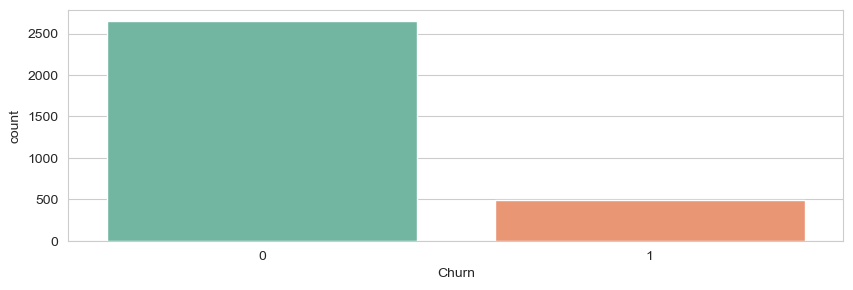

In [47]:
 plt.figure(figsize=(10,3))
sns.set_style(style = "whitegrid")
sns.countplot(x = "Churn", data = df,palette="Set2");

In [73]:
def countplot(column):
    plt.figure(figsize=(10,3))
    sns.set_style("whitegrid")
    ax = sns.countplot(x=column, data=df, hue="Churn",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=9.5)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=11,pad=20)
    plt.show()

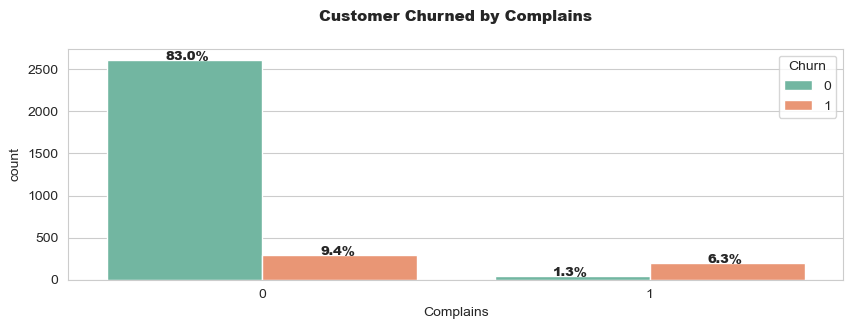

In [74]:
countplot('Complains')

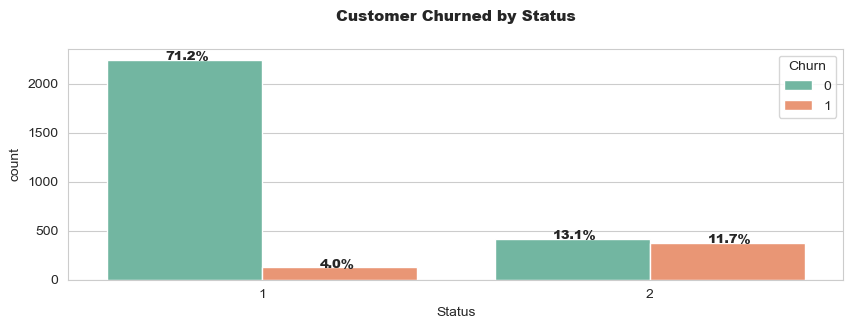

In [75]:
countplot('Status')

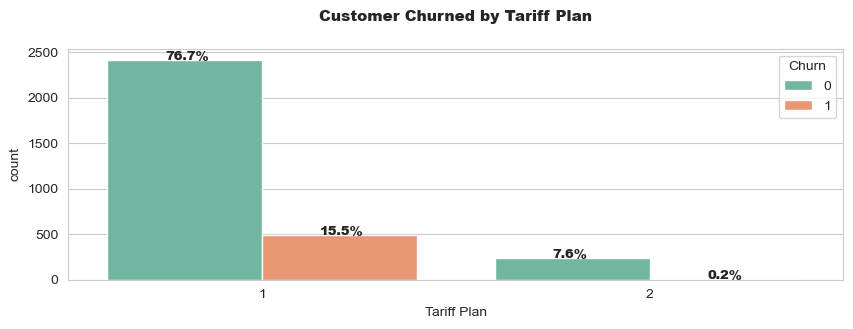

In [76]:
countplot("Tariff Plan")

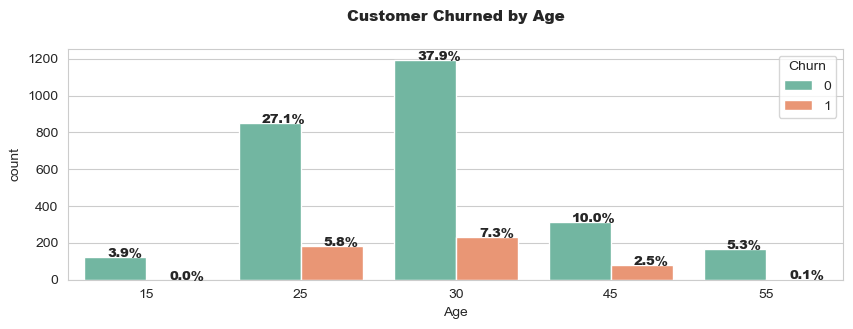

In [77]:
countplot('Age')

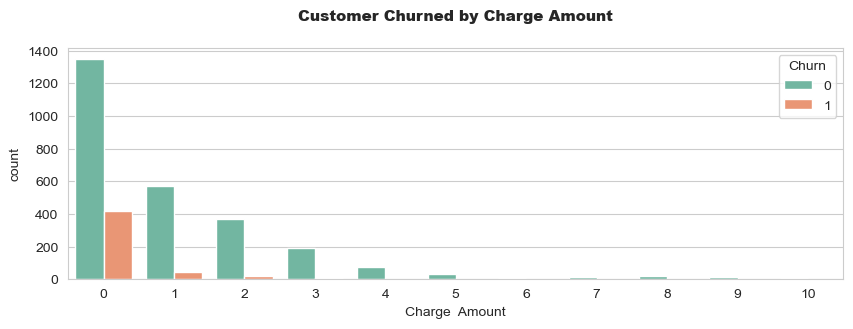

In [80]:
plt.figure(figsize=(10,3))
sns.countplot(x='Charge  Amount', data=df, hue="Churn",palette="Set2")
plt.title(f"Customer Churned by Charge Amount",fontweight="black",size=11,pad=20);

Text(0.5, 1.0, 'Seconds of Use by Churn')

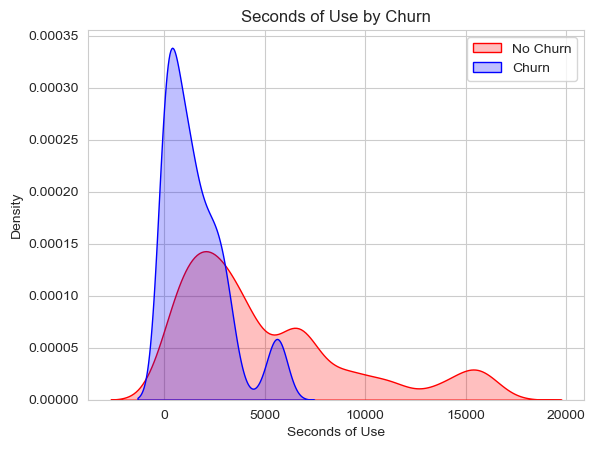

In [79]:
kde_plot = sns.kdeplot(df["Seconds of Use"][(df["Churn"] == 0) ],
                       color="Red", shade = True)
kde_plot = sns.kdeplot(df["Seconds of Use"][(df["Churn"] == 1) ],
                       ax=kde_plot, color="Blue", shade= True)
kde_plot.legend(["No Churn","Churn"],loc='upper right')
kde_plot.set_ylabel('Density')
kde_plot.set_xlabel('Seconds of Use')
kde_plot.set_title('Seconds of Use by Churn')

**Inference**

Customers who spend more seconds are unlikely to Churn

In [55]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [56]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


# Modelling

In [57]:
#Extracting Independent and dependent Variable 
X = df.drop(['Churn','Age'], axis=1)
y = df["Churn"]

In [58]:
#Spliting the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [59]:
#Training the Decision Tree Classification model
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
#predicting the set results 
y_pred= classifier.predict(X_test)
print(y_pred)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 0 0 1 0 0 0 

In [61]:
#Evaluate the performance
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm, '\n\n')
print('---------------------------------------------------')
results= metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(results)

accuracy:0.93


[[744  32]
 [ 36 133]] 


---------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       776
           1       0.81      0.79      0.80       169

    accuracy                           0.93       945
   macro avg       0.88      0.87      0.88       945
weighted avg       0.93      0.93      0.93       945



In [62]:
classifier.feature_importances_

array([0.07371276, 0.29143191, 0.11201339, 0.00253713, 0.19157874,
       0.03437314, 0.03693825, 0.03538903, 0.04066025, 0.        ,
       0.13937323, 0.04199216])

In [63]:
pd.DataFrame(index=X.columns,data=classifier.feature_importances_,
             columns=['Feature Importance']).sort_values(by='Feature Importance')

,Feature Importance
Tariff Plan,0.000000
Charge Amount,0.002537
Frequency of use,0.034373
Distinct Called Numbers,0.035389
Frequency of SMS,0.036938
Age Group,0.040660
Customer Value,0.041992
Call Failure,0.073713
Subscription Length,0.112013
Status,0.139373


**Inference**

**HIGH** Churn seen in cases of  **Complains** and **Status**

# CONCLUSION

   Some insights about the exercise

1. Customer complaints are the most significant predictor of churn. 


2. Age group between 25 and 45 are most likely to churn. 


3. The majority of customers uses tariff plan- Pay as you go which are more likely to churn
   comapared to the  contractual customers.
   
   
4. Csutomers who pay higher Charge amounts are unlikely to Churn


5. The model has an accuracy of 93%